In [1]:
# created by Xurui CHEN (xc1454)
# use NYC data portal NYC OPEN DATA https://opendata.cityofnewyork.us/

In [2]:
from __future__ import print_function # for compatibility beteen python2 and python3
import os
import pandas as pd
from matplotlib import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# !curl https://data.cityofnewyork.us/api/views/4wiz-brrj/rows.csv?accessType=DOWNLOAD > bussolutions.csv

#download from the portal and read .csv file
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

#!mv bussolutions.csv $PUIDATA
#!ls $PUIDATA

In [4]:
bsbc = pd.read_csv("%s/bussolutions.csv"%os.getenv("PUIDATA"))

In [5]:
# print the fist 8 lines
bsbc.head(7)

,event_name,event_description,event_url,local_start_time,local_end_time,capacity,status,category_name,subcategory_name,format_name,...,ticket_name,ticket_description,ticket_on_sale_status,ticket_quantity_total,ticket_quantity_sold,ticket_sales_start,ticket_sales_end,organizer_name,organizer_description,organizer_url
0,"Legal Clinic for Small Businesses, Lower Manha...",Legal Clinic for Small Businesses\nIn the earl...,https://www.eventbrite.com/e/legal-clinic-for-...,09/25/2018 05:00:00 PM,09/25/2018 07:00:00 PM,40,live,Business & Professional,Startups & Small Business,Seminar or Talk,...,Register,NaN,SOLD_OUT,40,40,05/01/2015 04:00:00 PM,12/31/2018 04:30:00 PM,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,https://www.eventbrite.com/o/nyc-department-of...
1,SBS-PTAC: Selling to Government Workshop (morn...,Learn how the government can become your custo...,https://www.eventbrite.com/e/sbs-ptac-selling-...,10/09/2018 10:00:00 AM,10/09/2018 12:00:00 PM,65,live,Business & Professional,Career,"Class, Training, or Workshop",...,General Admission,There will be no admittance to the workshop af...,AVAILABLE,65,24,03/16/2015 09:45:00 AM,10/08/2018 12:00:00 PM,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,https://www.eventbrite.com/o/nyc-department-of...
2,How to Become Certified As a Minority and Wome...,Learn about M/WBE Certification!\nBusinesses c...,https://www.eventbrite.com/e/how-to-become-cer...,11/08/2018 06:00:00 PM,11/08/2018 08:00:00 PM,255,live,Business & Professional,Career,"Class, Training, or Workshop",...,Register,NaN,AVAILABLE,255,10,09/03/2018 12:00:00 AM,11/08/2018 06:00:00 PM,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,https://www.eventbrite.com/o/nyc-department-of...
3,"Crowdfunding Your Business with Kiva, Washingt...",Crowdfunding Your Business with Kiva\nAre you ...,https://www.eventbrite.com/e/crowdfunding-your...,10/04/2018 10:00:00 AM,10/04/2018 12:00:00 PM,50,live,Business & Professional,Finance,"Class, Training, or Workshop",...,Register,NaN,AVAILABLE,50,9,09/20/2017 09:00:00 AM,10/04/2018 11:30:00 AM,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,https://www.eventbrite.com/o/nyc-department-of...
4,Legal and Tax Implications In Choosing a Busin...,Legal and Tax Implications In Choosing a Busin...,https://www.eventbrite.com/e/legal-and-tax-imp...,11/07/2018 12:30:00 PM,11/07/2018 02:00:00 PM,85,live,Business & Professional,Startups & Small Business,"Class, Training, or Workshop",...,Register,NaN,AVAILABLE,85,2,12/01/2016 12:00:00 AM,11/07/2018 09:00:00 AM,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,https://www.eventbrite.com/o/nyc-department-of...
5,"Website Fundamentals, Staten Island, 9/29/18",Website FundamentalsMake your business known o...,https://www.eventbrite.com/e/website-fundament...,09/29/2018 01:00:00 PM,09/29/2018 04:00:00 PM,30,live,Business & Professional,Sales & Marketing,"Class, Training, or Workshop",...,Register,NaN,AVAILABLE,30,12,07/13/2018 09:00:00 AM,09/30/2018 06:30:00 PM,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,https://www.eventbrite.com/o/nyc-department-of...
6,SS4G Alumni Workshop: Reducing Stress,The good news is that stress is self-created. ...,https://www.eventbrite.com/e/ss4g-alumni-works...,09/24/2018 06:00:00 PM,09/24/2018 08:00:00 PM,25,live,NaN,NaN,NaN,...,General Admission,NaN,AVAILABLE,25,15,09/04/2018 09:05:00 AM,10/14/2018 06:00:00 PM,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,https://www.eventbrite.com/o/nyc-department-of...


In [6]:
# look at the columns available, those are the variables
bsbc.columns

Index(['event_name', 'event_description', 'event_url', 'local_start_time',
       'local_end_time', 'capacity', 'status', 'category_name',
       'subcategory_name', 'format_name', 'address_1', 'address_2', 'city',
       'region', 'postal_code', 'country', 'venue_name', 'ticket_name',
       'ticket_description', 'ticket_on_sale_status', 'ticket_quantity_total',
       'ticket_quantity_sold', 'ticket_sales_start', 'ticket_sales_end',
       'organizer_name', 'organizer_description', 'organizer_url'],
      dtype='object')

In [7]:
# count how many rows, those are the data points
bsbc.size

2673

In [8]:
# select 2 columns for plotting
bsbc_2c = bsbc[['capacity', 'ticket_quantity_sold']]
bsbc_2c.head()

,capacity,ticket_quantity_sold
0,40,40
1,65,24
2,255,10
3,50,9
4,85,2


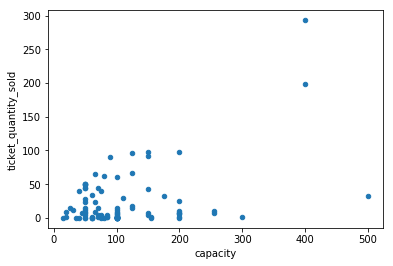

In [9]:
bsbc_2c.plot(x="capacity", y="ticket_quantity_sold", kind='scatter')

# Figure 1
The figure is about the number of sold tickers against the capacity of each course provided by NYC Business Solutions. Those two variable do not show a strong correlation. And note that many courses sold 0 tiket.

In [10]:
## use API and download a json file
url = "https://data.cityofnewyork.us/resource/4wiz-brrj.json"
bsbcj = pd.read_json(url)

In [11]:
bsbcj.head(8)

,address_1,address_2,capacity,category_name,city,country,event_description,event_name,event_url,format_name,...,status,subcategory_name,ticket_description,ticket_name,ticket_on_sale_status,ticket_quantity_sold,ticket_quantity_total,ticket_sales_end,ticket_sales_start,venue_name
0,90-27 Sutphin Blvd,4th Floor,100,Business & Professional,Jamaica,US,Business owners know that securing the right c...,Signing A Commercial Lease: What You Need To K...,https://www.eventbrite.com/e/signing-a-commerc...,"Class, Training, or Workshop",...,live,Startups & Small Business,NaN,Register,AVAILABLE,1,100,2018-10-23T09:00:00.000,2018-01-29T15:00:00.000,Small Business Support Center
1,110 William Street,2nd floor,25,NaN,New York,US,The good news is that stress is self-created. ...,SS4G Alumni Workshop: Reducing Stress,https://www.eventbrite.com/e/ss4g-alumni-works...,NaN,...,live,NaN,NaN,General Admission,AVAILABLE,16,25,2018-10-14T18:00:00.000,2018-09-04T09:05:00.000,NYC Dept. of Small Business Services
2,110 William Street,7th Floor,100,Business & Professional,New York,US,Creating Content Your Customers Value\nMany bu...,"Creating Content Your Customers Value, Lower M...",https://www.eventbrite.com/e/creating-content-...,"Class, Training, or Workshop",...,live,Startups & Small Business,NaN,RSVP,AVAILABLE,18,100,2019-04-06T17:00:00.000,2016-12-01T00:00:00.000,NYC Department of Small Business Services
3,7 Marcus Garvey Blvd.,NaN,150,Business & Professional,BROOKLYN,US,10 Steps to Starting Your Own Business\nLearn ...,"10 Steps to Starting Your Own Business, BROOKL...",https://www.eventbrite.com/e/10-steps-to-start...,"Class, Training, or Workshop",...,live,Startups & Small Business,NaN,Register,AVAILABLE,44,150,2018-11-06T16:00:00.000,2018-09-03T00:00:00.000,Brooklyn Commons
4,"560 West 181st Street, 2nd Floor",NaN,50,Business & Professional,New York,US,Crowdfunding Su Negocio Con Kiva\n¿Tiene dific...,"Obtenga Capital Para Su Negocio, Washington He...",https://www.eventbrite.com/e/obtenga-capital-p...,"Class, Training, or Workshop",...,live,Finance,NaN,Register,AVAILABLE,11,50,2018-10-16T11:00:00.000,2017-09-20T09:00:00.000,NYC Business Solutions Washington Heights Center
5,361 West 125th Street,Room 1A,50,Business & Professional,New York,US,How M/WBEs Can Do Business with the NYC Depart...,How M/WBEs Can Do Business with the NYC Depart...,https://www.eventbrite.com/e/how-mwbes-can-do-...,"Class, Training, or Workshop",...,live,Career,NaN,RSVP,SOLD_OUT,50,50,2018-09-26T16:00:00.000,2018-08-01T00:00:00.000,"NYC Business Solutions, Upper Manhattan Center"
6,90-27 Sutphin Blvd,4th Fl,200,Business & Professional,Jamaica,US,\nTHIS IS NOT A CLASS; BY APPOINTMENT ONLY; S...,Worry Free Hiring for the Small Business Owner...,https://www.eventbrite.com/e/worry-free-hiring...,"Class, Training, or Workshop",...,live,Startups & Small Business,Registration is free.,Register,AVAILABLE,97,200,2019-01-04T17:00:00.000,2017-02-21T13:00:00.000,NYC Business Solutions - Queens Center
7,1000 SAINT NICHOLAS AVENUE,NaN,50,Business & Professional,New York,US,10 Steps to Starting Your Own Business\nLearn ...,"10 Steps to Starting Your Own Business, Washin...",https://www.eventbrite.com/e/10-steps-to-start...,"Class, Training, or Workshop",...,live,Startups & Small Business,Registration is free.,Register,AVAILABLE,4,50,2018-12-28T14:00:00.000,2018-06-29T09:00:00.000,WASHINGTON HEIGHTS NY PUBLIC LIBRARY


In [12]:
bsbcj_2c = bsbcj[['ticket_sales_start','ticket_quantity_sold']]

In [13]:
bsbcj_2c.head()

,ticket_sales_start,ticket_quantity_sold
0,2018-01-29T15:00:00.000,1
1,2018-09-04T09:05:00.000,16
2,2016-12-01T00:00:00.000,18
3,2018-09-03T00:00:00.000,44
4,2017-09-20T09:00:00.000,11


In [14]:
bsbcj_2c['ticket_sales_start'] = bsbcj_2c['ticket_sales_start'].apply(lambda x:  pd.to_datetime(pd.Timestamp(x), format='%Y%m%d'))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
# clean the rows with missing data, so we can plot the timestamp in the figure
bsbcj_2cnona = bsbcj_2c.dropna()

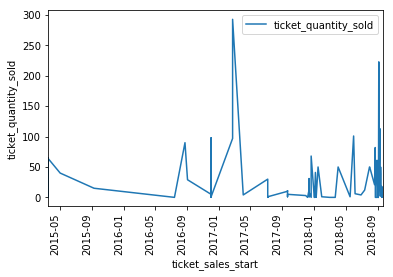

In [16]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = bsbcj_2cnona.plot(x='ticket_sales_start', y='ticket_quantity_sold', rot=90);
ax.set_ylabel("ticket_quantity_sold");
#print(bsbcj_2c)

# Figure 2
The figure is about the number of sold tickers as a function of ticket saleing start time from 05/2015 to 09/2018. The number arrives peak in early 2017. This is no single trend. The fluctuation becomes strong after 2016.